In [1]:
# Data processing
import iris
import iris.analysis
import iris.coord_categorisation
import warnings
warnings.filterwarnings('ignore', module='iris')
import numpy as np
from pathlib import Path
# Visualization
import cartopy.util
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.offsetbox import AnchoredText
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Path to figures
path_to_figs = Path.cwd().parent.parent.parent / 'results' / 'xojn'
path_to_figs.mkdir(exist_ok=True)

In [3]:
# Global variables
JOBS = {'BASE OLD':'xojnd',
        'BASE'    :'xojng',
        'CHEM'    :'xojnh',
        'MARI'    :'xojni',
        'FIRE'    :'xojnc',
        'FULL'    :'xojnl',
        'ORIG'    :'xolnb',
        'UPDT'    :'xolna'}
VARIABLES = {'molar_mass': {'o3':47.997, 'no':30.006, 'no2':46.006, 'hono':47.013, 'ho2no2':79.01224, 'hno3':63.012, 'n2o5':108.01, 
                            'pan':121.0489, 'ppan':135.0755,
                            'meono2':77.0394, 'etono2':91.0660, 'nprono2':105.0926, 'iprono2':105.0926,
                            'ch4':16.0425, 'c2h6':30.0690},
             'latex': {'o3':'$O_3$', 'no':'NO', 'no2':'$NO_2$', 'hono':'HONO', 'ho2no2':'$HO_2NO_2$', 'hno3':'$HNO_3$', 'n2o5':'N_2O_5', 
                       'pan':'PAN', 'ppan':'PPN', 
                       'nox':'$NO_x$', 'noy':'$NO_y$', 
                       'meono2':'$MeONO_2$', 'etono2':'$EtONO_2$', 'nprono2':'$nPrONO_2$', 'iprono2':'$iPrONO_2$', 'prono2':'$PrONO_2$',
                       'ch4':'$CH_4$', 'c2h6':'$C_2H_6$'}}
M_air = 28.97 # molar mass of dry air [g mol-1]

In [4]:
# Switches
exp = 'FULL'
var = 'noy'
savefig = False

In [5]:
# Read data
job = JOBS[exp]
path_to_ukca = Path.cwd().parent / 'raw'
if var == 'noy':
    meono2 = iris.load_cube(str(path_to_ukca / job / f'{job}_meono2.nc'), 'meono2')*(M_air/(VARIABLES['molar_mass']['meono2']))*1e12
    etono2 = iris.load_cube(str(path_to_ukca / job / f'{job}_etono2.nc'), 'etono2')*(M_air/(VARIABLES['molar_mass']['etono2']))*1e12
    nprono2 = iris.load_cube(str(path_to_ukca / job / f'{job}_nprono2.nc'), 'nprono2')*(M_air/(VARIABLES['molar_mass']['nprono2']))*1e12
    iprono2 = iris.load_cube(str(path_to_ukca / job / f'{job}_iprono2.nc'), 'iprono2')*(M_air/(VARIABLES['molar_mass']['iprono2']))*1e12
    pan = iris.load_cube(str(path_to_ukca / job / f'{job}_pan.nc'), 'pan')*(M_air/(VARIABLES['molar_mass']['pan']))*1e12
    hno3 = iris.load_cube(str(path_to_ukca / job / f'{job}_hno3.nc'), 'hno3')*(M_air/(VARIABLES['molar_mass']['hno3']))*1e12
    no = iris.load_cube(str(path_to_ukca / job / f'{job}_no.nc'), 'no')*(M_air/(VARIABLES['molar_mass']['no']))*1e12
    no2 = iris.load_cube(str(path_to_ukca / job / f'{job}_no2.nc'), 'no2')*(M_air/(VARIABLES['molar_mass']['no2']))*1e12
    nox = no.copy() + no2.copy()
# if var == 'rono2':
#     cb1 = iris.load_cube(str(path_to_ukca / job / f'{job}_meono2.nc'), 'meono2')*(M_air/(VARIABLES['molar_mass']['meono2']))*1e12
#     cb2 = iris.load_cube(str(path_to_ukca / job / f'{job}_etono2.nc'), 'etono2')*(M_air/(VARIABLES['molar_mass']['etono2']))*1e12
#     cb3 = iris.load_cube(str(path_to_ukca / job / f'{job}_nprono2.nc'), 'nprono2')*(M_air/(VARIABLES['molar_mass']['nprono2']))*1e12
#     cb4 = iris.load_cube(str(path_to_ukca / job / f'{job}_iprono2.nc'), 'iprono2')*(M_air/(VARIABLES['molar_mass']['iprono2']))*1e12
#     cb = cb1.copy() + cb2.copy() + cb3.copy() + cb4.copy()
# elif var == 'prono2':
#     cb1 = iris.load_cube(str(path_to_ukca / job / f'{job}_nprono2.nc'), 'nprono2')*(M_air/(VARIABLES['molar_mass']['nprono2']))*1e12
#     cb2 = iris.load_cube(str(path_to_ukca / job / f'{job}_iprono2.nc'), 'iprono2')*(M_air/(VARIABLES['molar_mass']['iprono2']))*1e12
# else:
#     cb = iris.load_cube(str(path_to_ukca / job / f'{job}_{var}.nc'), var)*(M_air/VARIABLES['molar_mass'][var])*1e12
# cb = cb[24::,...] # remove the first 2 years as a spin up
# # Add season and year coordinates
# iris.coord_categorisation.add_season(cb, 'time', name='season')
# iris.coord_categorisation.add_season_year(cb, 'time', name='year')
# # Simplify dimensions
# lons = cb.coord('longitude').points
# lats = cb.coord('latitude').points

In [6]:
# Remove the first 2 years as a spin up
meono2 = meono2[24:,...]
etono2 = etono2[24:,...]
nprono2 = nprono2[24:,...]
iprono2 = iprono2[24:,...]
pan = pan[24:,...]
hno3 = hno3[24:,...]
nox = nox[24:,...]
# Add season and year coordinates
for icb in [meono2, etono2, nprono2, iprono2, pan, hno3, nox]:
    iris.coord_categorisation.add_season(icb, 'time', name='season')
    iris.coord_categorisation.add_season_year(icb, 'time', name='year')

#### NOy partitioning

In [16]:
# Define constraints
pacific = iris.Constraint(longitude=lambda cell: 180 < cell < 230)
below_2_km = iris.Constraint(level_height=lambda cell: 0 < cell.point < 2000)
# Extract data
meono2_pac_pbl = meono2.extract(pacific & below_2_km)
etono2_pac_pbl = etono2.extract(pacific & below_2_km)
nprono2_pac_pbl = nprono2.extract(pacific & below_2_km)
iprono2_pac_pbl = iprono2.extract(pacific & below_2_km)
pan_pac_pbl = pan.extract(pacific & below_2_km)
hno3_pac_pbl = hno3.extract(pacific & below_2_km)
nox_pac_pbl = nox.extract(pacific & below_2_km)
# Average data
meono2_pac_pbl_ann_ave = meono2_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)
etono2_pac_pbl_ann_ave = etono2_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)
nprono2_pac_pbl_ann_ave = nprono2_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)
iprono2_pac_pbl_ann_ave = iprono2_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)
pan_pac_pbl_ann_ave = pan_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)
hno3_pac_pbl_ann_ave = hno3_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)
nox_pac_pbl_ann_ave = nox_pac_pbl.collapsed(['longitude', 'level_height', 'year'], iris.analysis.MEAN)

In [107]:
# Use the same colours as in Fisher et al. (2018) Figure 7
clr_nox = colors.to_rgba('#0189C4')
clr_hno3 = colors.to_rgba('#00AE85')
clr_pan = colors.to_rgba('#FF6B01')
clr_meono2 = colors.to_rgba('#FFB400')
# Increase transparency of EtONO2 and PrONO2 colours
clr_etono2_list = list(clr_meono2)
clr_prono2_list = list(clr_meono2)
clr_etono2_list[-1]=0.5
clr_prono2_list[-1]=0.3
clr_etono2 = tuple(clr_etono2_list)
clr_prono2 = tuple(clr_prono2_list)

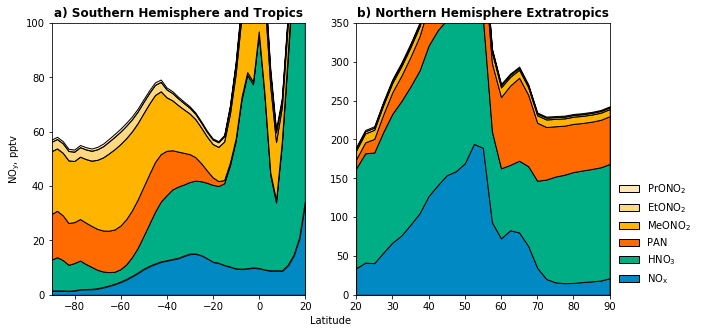

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].stackplot(meono2.coord('latitude').points[0:45], 
             nox_pac_pbl_ann_ave.data[0:45], hno3_pac_pbl_ann_ave.data[0:45],
             pan_pac_pbl_ann_ave.data[0:45], meono2_pac_pbl_ann_ave.data[0:45],
             etono2_pac_pbl_ann_ave.data[0:45], 
             nprono2_pac_pbl_ann_ave.data[0:45]+iprono2_pac_pbl_ann_ave.data[0:45], 
             colors=[clr_nox, clr_hno3, clr_pan, clr_meono2, clr_etono2, clr_prono2],
#              linestyles={'-', '-', '-', '--', '-.'},
             edgecolor='k');
ax[1].stackplot(meono2.coord('latitude').points[44:], 
             nox_pac_pbl_ann_ave.data[44:], hno3_pac_pbl_ann_ave.data[44:],
             pan_pac_pbl_ann_ave.data[44:], meono2_pac_pbl_ann_ave.data[44:],
             etono2_pac_pbl_ann_ave.data[44:], 
             nprono2_pac_pbl_ann_ave.data[44:]+iprono2_pac_pbl_ann_ave.data[44:],
             colors=[clr_nox, clr_hno3, clr_pan, clr_meono2, clr_etono2, clr_prono2],
#              linestyles={'-', '-', '-', '--', '-.'},
             edgecolor='k',
             labels=['$NO_x$', '$HNO_3$', 'PAN', '$MeONO_2$', '$EtONO_2$', '$PrONO_2$']);
ax[0].set_title('a) Southern Hemisphere and Tropics', weight='bold')
ax[1].set_title('b) Northern Hemisphere Extratropics', weight='bold')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Latitude')
ax[0].set_ylabel('$NO_y$, pptv')
ax[0].set_xlim(-90,20);
ax[1].set_xlim(20,90);
ax[0].set_ylim(0,100);
ax[1].set_ylim(0,350);
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(reversed(handles), reversed(labels), frameon=False, bbox_to_anchor=(1, 0), loc='lower left');

In [ ]:
break

#### Annual means within 0-2, 2-6, 6-10 km

In [ ]:
if var != 'rono2':
    # Define constraints
    km_0_2 = iris.Constraint(level_height=lambda cell: 0 < cell.point < 2000) # 10
    km_2_6 = iris.Constraint(level_height=lambda cell: 2000 < cell.point < 6000) #  17
    km_6_10 = iris.Constraint(level_height=lambda cell: 6000 < cell.point < 10000) # 22
    # Extract and average data
    km_0_2_ann_ave = cb.extract(km_0_2).collapsed(['year', 'level_height'], iris.analysis.MEAN)
    km_2_6_ann_ave = cb.extract(km_2_6).collapsed(['year', 'level_height'], iris.analysis.MEAN)
    km_6_10_ann_ave = cb.extract(km_6_10).collapsed(['year', 'level_height'], iris.analysis.MEAN)
    # Add a cyclic point
    c_km_0_2_ann_ave, c_lons = cartopy.util.add_cyclic_point(km_0_2_ann_ave.data, coord=lons)
    c_km_2_6_ann_ave = cartopy.util.add_cyclic_point(km_2_6_ann_ave.data)
    c_km_6_10_ann_ave = cartopy.util.add_cyclic_point(km_6_10_ann_ave.data)
    # Choose colorbar scale
    cscale = 'sat' # 'saturated' or 'unsaturated'
    if var in ['meono2', 'etono2', 'nprono2', 'iprono2', 'prono2']:
        if cscale == 'sat':
            vmax0, vmax1, vmax2 = 10, 15, 20
            ticks0 = [0, 5, 10]
            ticks1 = [0, 7.5, 15]
            ticks2 = [0, 10, 20]
        else:
            vmax0, vmax1, vmax2 = 40, 60, 80
            ticks0 = [0, 20, 40]
            ticks1 = [0, 30, 60]
            ticks2 = [0, 40, 80]

In [ ]:
if var != 'rono2':
    plt.rcParams['axes.titlesize'] = 26
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['font.size'] = 18
    # Plot annual mean within 0-2, 2-6, 6-10 km
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,16), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=230)), facecolor='w')
    p0 = ax[0].pcolormesh(c_lons, lats, c_km_6_10_ann_ave.data, vmin=0, vmax=vmax0, transform=ccrs.PlateCarree())
    p1 = ax[1].pcolormesh(c_lons, lats, c_km_2_6_ann_ave.data, vmin=0, vmax=vmax1, transform=ccrs.PlateCarree())
    p2 = ax[2].pcolormesh(c_lons, lats, c_km_0_2_ann_ave.data, vmin=0, vmax=vmax2, transform=ccrs.PlateCarree())
    cb0 = fig.colorbar(p0, ax=ax[0], ticks=ticks0)
    cb1 = fig.colorbar(p1, ax=ax[1], ticks=ticks1)
    cb2 = fig.colorbar(p2, ax=ax[2], ticks=ticks2)
    fig.text(0.84, 0.873, 'pptv', fontsize=20)
    ax[0].add_artist(AnchoredText('6-10 km', loc='lower left', bbox_to_anchor=(-0.03, 0.85), bbox_transform=ax[0].transAxes, frameon=False))
    ax[1].add_artist(AnchoredText('2-6 km', loc='lower left', bbox_to_anchor=(-0.03, 0.85), bbox_transform=ax[1].transAxes, frameon=False))
    ax[2].add_artist(AnchoredText('0-2 km', loc='lower left', bbox_to_anchor=(-0.03, 0.85), bbox_transform=ax[2].transAxes, frameon=False))
    ax[0].set_title(f'UM-UKCA {exp}', loc='left', weight='bold', fontsize=20)
    ax[0].set_title(VARIABLES['latex'][var], loc='center')
    for iax in ax.flatten(): iax.coastlines();
    fig.subplots_adjust(hspace=0.1)
    if savefig: fig.savefig(path_to_figs / 'Fisher2018-like' / f'Fisher2018-like_{exp.lower()}_{var}_{cscale}.png', bbox_inches='tight')

#### Zonal seasonal means below 12 km within 130-180W

In [ ]:
if var == 'rono2':
    # Define constraints
    pacific = iris.Constraint(longitude=lambda cell: 180 < cell < 230)
    below_12_km = iris.Constraint(level_height=lambda cell: 0 < cell.point < 12000) # mid 11520.002, bounds = [11049.996, 12009.998]
    winter = iris.Constraint(season='djf')
    spring = iris.Constraint(season='mam')
    summer = iris.Constraint(season='jja')
    autumn = iris.Constraint(season='son')
    # Extract data
    pac_znl_djf = cb.extract(pacific & below_12_km & winter)
    pac_znl_mam = cb.extract(pacific & below_12_km & spring)
    pac_znl_jja = cb.extract(pacific & below_12_km & summer)
    pac_znl_son = cb.extract(pacific & below_12_km & autumn)
    # Average data
    pac_znl_djf_ave = pac_znl_djf.collapsed(['longitude', 'season'], iris.analysis.MEAN)
    pac_znl_mam_ave = pac_znl_mam.collapsed(['longitude', 'season'], iris.analysis.MEAN)
    pac_znl_jja_ave = pac_znl_jja.collapsed(['longitude', 'season'], iris.analysis.MEAN)
    pac_znl_son_ave = pac_znl_son.collapsed(['longitude', 'season'], iris.analysis.MEAN)
    # Merge two colormaps: color values present in GEOS-Chem and UM-UKCA using one colormap and UM-UKCA higher than GEOS-Chem using another colormap
    class MidpointNormalize(colors.Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)
        def __call__(self, value, clip=None):
            x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y))
    colors_low = plt.cm.viridis(np.linspace(0,1,128))
    colors_high = plt.cm.autumn_r(np.linspace(0,1,128))
    colors_stack = np.vstack((colors_low, colors_high))
    mrgd_cmap = colors.LinearSegmentedColormap.from_list('merged_cmap', colors_stack)

In [ ]:
if var == 'rono2':
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['font.size'] = 14
    # Plot zonal seasonal means below 12 km within 130-180W 
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(9,13.9), facecolor='w', sharex=True)
    levs = pac_znl_djf.coord('level_height').points/1000
    p0 = ax[0].pcolormesh(lats, levs, pac_znl_djf_ave.data, norm=MidpointNormalize(midpoint=30), cmap=mrgd_cmap, vmin=0)
    p1 = ax[1].pcolormesh(lats, levs, pac_znl_mam_ave.data, norm=MidpointNormalize(midpoint=30), cmap=mrgd_cmap, vmin=0)
    p2 = ax[2].pcolormesh(lats, levs, pac_znl_jja_ave.data, norm=MidpointNormalize(midpoint=30), cmap=mrgd_cmap, vmin=0)
    p3 = ax[3].pcolormesh(lats, levs, pac_znl_son_ave.data, norm=MidpointNormalize(midpoint=30), cmap=mrgd_cmap, vmin=0)

    cax = fig.add_axes([0.125, 0.06, 0.773, 0.02]) # [left, bottom, width, height]
    cbar = fig.colorbar(p3, cax=cax, orientation='horizontal') #, extend='max')
    fig.text(0.91, 0.041, 'pptv')
    # cmap = plt.cm.get_cmap('viridis')
    # cmap.set_over('gold')

    c0 = ax[0].contour(lats, levs, pac_znl_djf_ave.data, levels=[30], colors='w')
    c1 = ax[1].contour(lats, levs, pac_znl_mam_ave.data, levels=[30], colors='w')
    c2 = ax[2].contour(lats, levs, pac_znl_jja_ave.data, levels=[30], colors='w')
    c3 = ax[3].contour(lats, levs, pac_znl_son_ave.data, levels=[30], colors='w')

    ax[0].add_artist(AnchoredText('DJF', loc=2, frameon=False, prop=dict(color='w', fontweight='bold')))
    ax[1].add_artist(AnchoredText('MAM', loc=2, frameon=False, prop=dict(color='w', fontweight='bold')))
    ax[2].add_artist(AnchoredText('JJA', loc=2, frameon=False, prop=dict(color='w', fontweight='bold')))
    ax[3].add_artist(AnchoredText('SON', loc=2, frameon=False, prop=dict(color='w', fontweight='bold')))

    ax[0].set_title(u'$C_1$-$C_3$ $RONO_2$ (130-180\u00b0W)', loc='center')
    ax[0].set_title(f'UM-UKCA {exp}', loc='left', weight='bold', fontsize=13)
    ax[3].set_xlabel('Latitude')
    ax[3].set_xticks([-90, -60, -30, 0, 30, 60, 90])
    for iax in ax[0:3].flatten(): iax.xaxis.set_ticks_position('none')
    for iax in ax.flatten():
        iax.set_ylabel('Altutude (km)')
        for c in [c0, c1, c2, c3]: 
            iax.clabel(c, fmt='%2i', colors='w')
    fig.subplots_adjust(hspace=0.035)
    if savefig: fig.savefig(path_to_figs / 'Fisher2018-like' / f'Fisher2018-like_{exp.lower()}_{var}.png', bbox_inches='tight')